# **Reducción de dimensionalidad**


In [1]:
import sys
import sklearn
import numpy as np
import os
import pandas as pd
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [7]:
import sklearn.datasets


iris = sklearn.datasets.load_iris()

X = iris.data
y= iris.target

type(X), type(y)




(numpy.ndarray, numpy.ndarray)

In [9]:
df = pd.DataFrame(X,columns=iris.feature_names)
df['Label']=y
df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Tenemos 4 dimensiones!

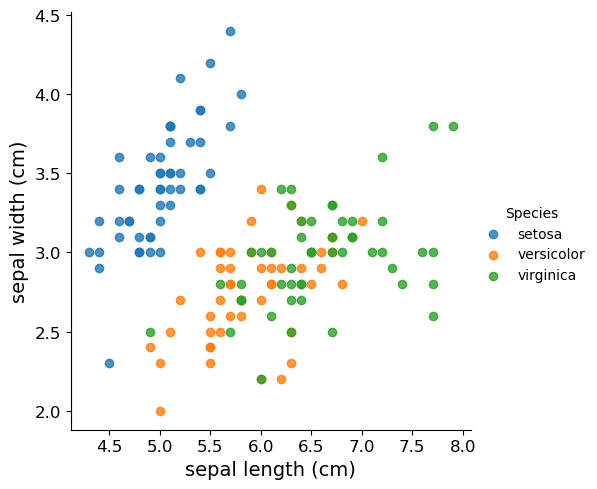

In [11]:
# imprimimos lo que podemos

sns.lmplot(x=df.columns[0],
           y=df.columns[1],
           data=df,
           hue='Species',
           fit_reg=False)


# PCA


In [14]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4'])
df = pd.merge(df, pca_df, right_index=True, left_index=True)
df

# Hacemos un PCA y lo añadimos al dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label,Species,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,0,setosa,-2.684126,0.319397,-0.027915,-0.002262
1,4.9,3.0,1.4,0.2,0,setosa,-2.714142,-0.177001,-0.210464,-0.099027
2,4.7,3.2,1.3,0.2,0,setosa,-2.888991,-0.144949,0.017900,-0.019968
3,4.6,3.1,1.5,0.2,0,setosa,-2.745343,-0.318299,0.031559,0.075576
4,5.0,3.6,1.4,0.2,0,setosa,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1.944110,0.187532,0.177825,-0.426196
146,6.3,2.5,5.0,1.9,2,virginica,1.527167,-0.375317,-0.121898,-0.254367
147,6.5,3.0,5.2,2.0,2,virginica,1.764346,0.078859,0.130482,-0.137001
148,6.2,3.4,5.4,2.3,2,virginica,1.900942,0.116628,0.723252,-0.044595


In [15]:
print('Mostrando el ratio de la varianza (Variance Ratio)')
for i in range(4):
    print(f"PC{i+1}: {pca.explained_variance_ratio_[i]}")

Mostrando el ratio de la varianza (Variance Ratio)
PC1: 0.9246187232017271
PC2: 0.05306648311706783
PC3: 0.01710260980792977
PC4: 0.005212183873275369


In [16]:
# la suma del vector EVR debe ser 1 (por eso es un ratio!)
sum(pca.explained_variance_ratio_)

1.0

Text(0.5, 1.0, 'Iris Data en una dimensión')

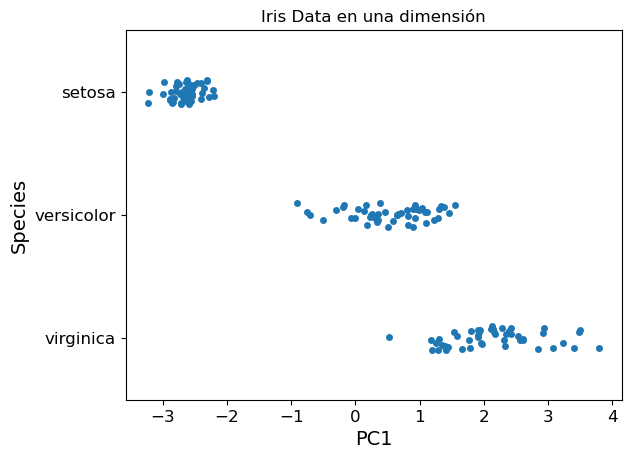

In [17]:
# mostramos el dataset en 1 dimensión
sns.stripplot(x='PC1', y='Species', data= df, jitter=True)
plt.title('Iris Data en una dimensión')

Text(0.5, 1.0, 'Iris Data Visualized in Two Dimensions')

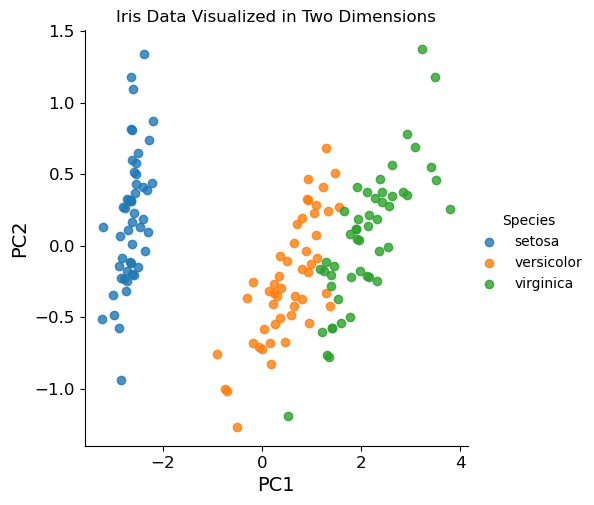

In [19]:
# mostramos el dataset en 2 dimensiones
sns.lmplot(x='PC1', y='PC2', data= df,hue='Species',fit_reg=False)
plt.title('Iris Data Visualized in Two Dimensions')

Of course, there was some loss of information during the projection step, so the recovered 3D points are not exactly equal to the original 3D points:

## Explained Variance Ratio

In [20]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Una vez realizado PCA, este array nos indica para cada dimensión obtenida la "cantidad de información" que retiene de los datos originales.
La primera dimensión posee el 92.4% de la varianza, y la última el 0.5% ...
Receurda: la suma es 1.

Al usar sólo las dos primeras dimensionaes (PC1, PC2), conservamos el 97.8% de la información original.
Luego perdemos el 2.2%

In [21]:
pca.explained_variance_ratio_[2:].sum()

0.02231479368120514

## Escogiendo el número adecuado de dimensiones

In [22]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

# leemos el dataset MNIST

In [23]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1

# aplicamos MNIST sobre él

In [25]:
d

154

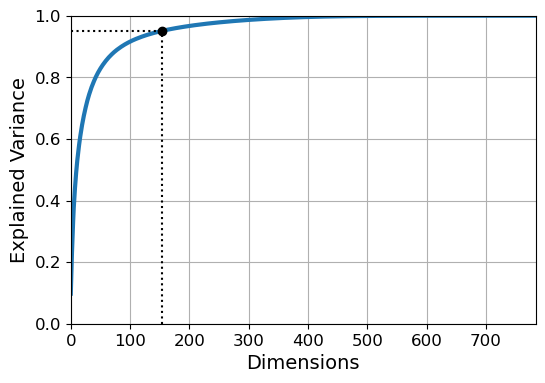

In [26]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 784, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

In [27]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [28]:
pca.n_components_

154

In [29]:
np.sum(pca.explained_variance_ratio_)

0.9503858762649947

## PCA usado para comprimir información

In [30]:
pca = PCA(n_components=153)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [31]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

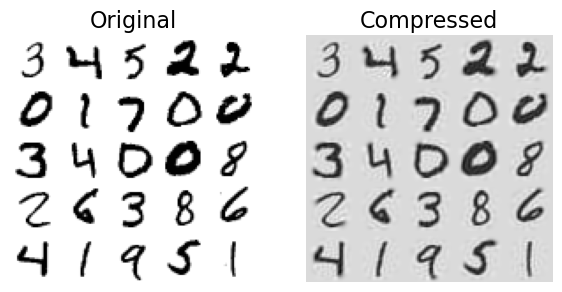

In [32]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

In [33]:
X_reduced_pca = X_reduced

## Randomized PCA

In [34]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

## Incremental PCA

In [35]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") # not shown in the book
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [36]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

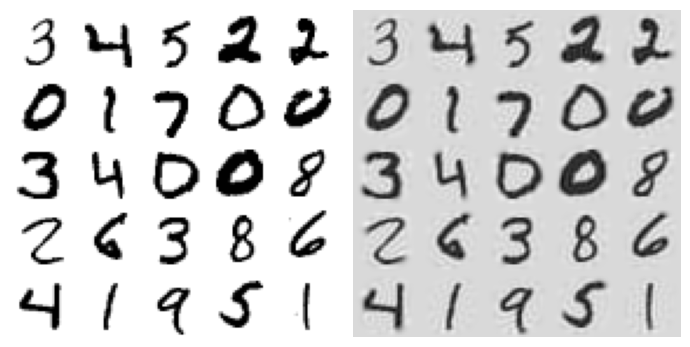

In [37]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

Let's compare the results of transforming MNIST using regular PCA and incremental PCA. First, the means are equal: 

In [38]:
np.allclose(pca.mean_, inc_pca.mean_)

True

/home/alumnado/xuwira22/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/alumnado/xuwira22/miniconda3/envs/ML/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


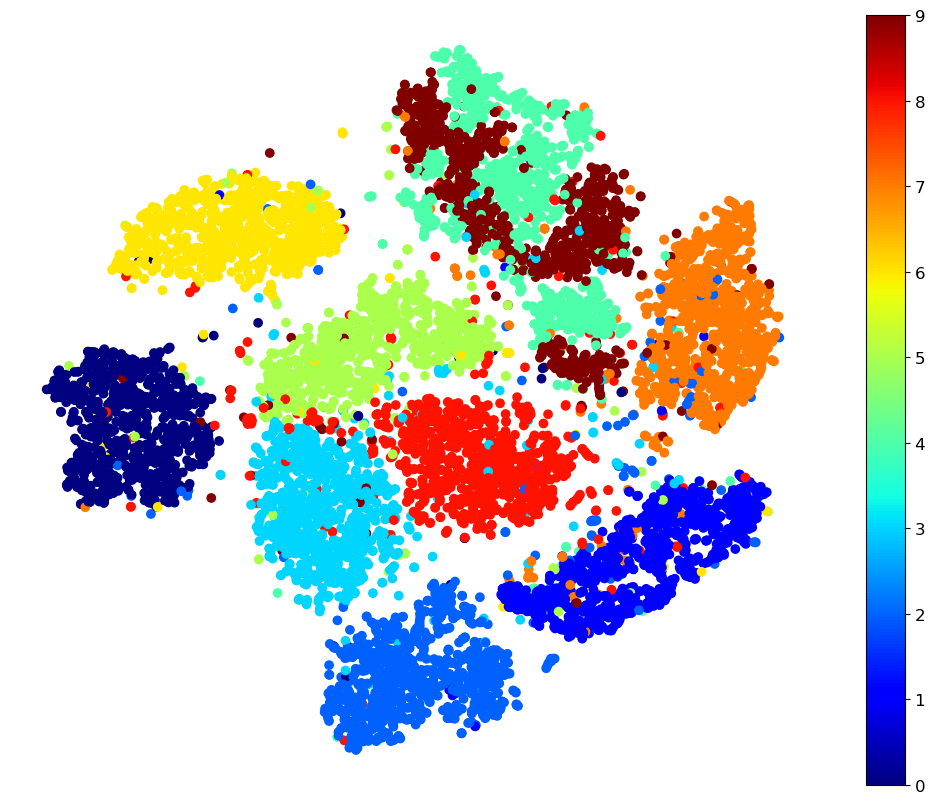

In [39]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [40]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

Let's try it! First let's just write colored digits:

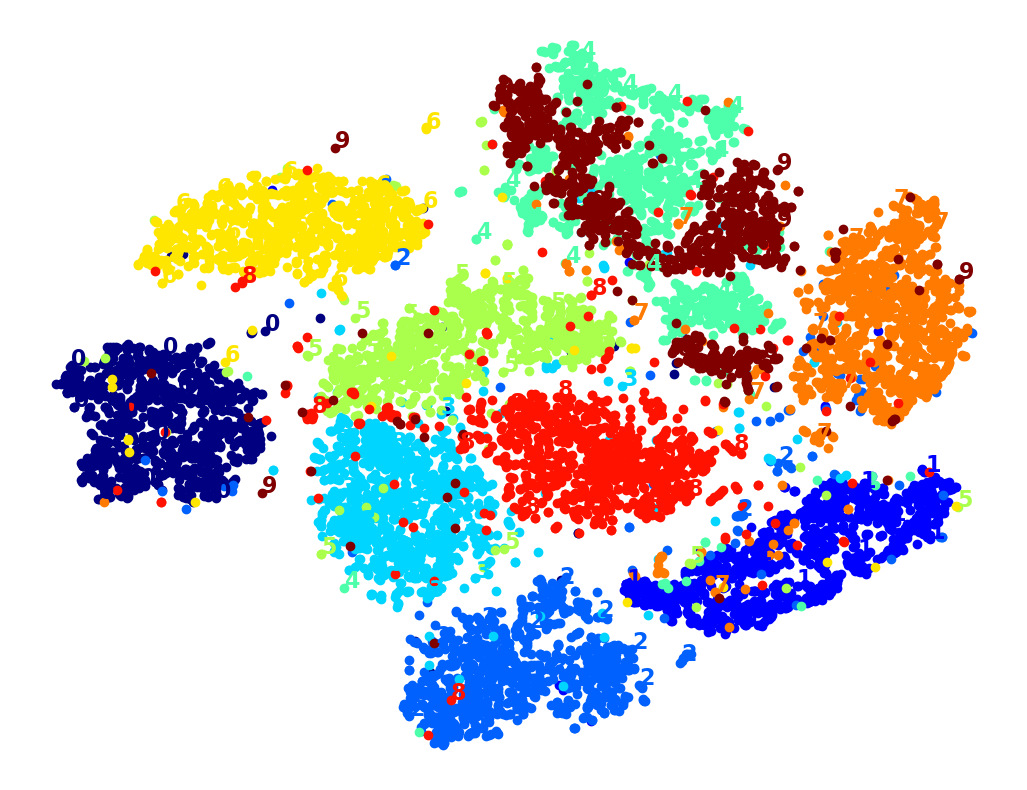

In [41]:
plot_digits(X_reduced, y)

Well that's okay, but not that beautiful. Let's try with the digit images:

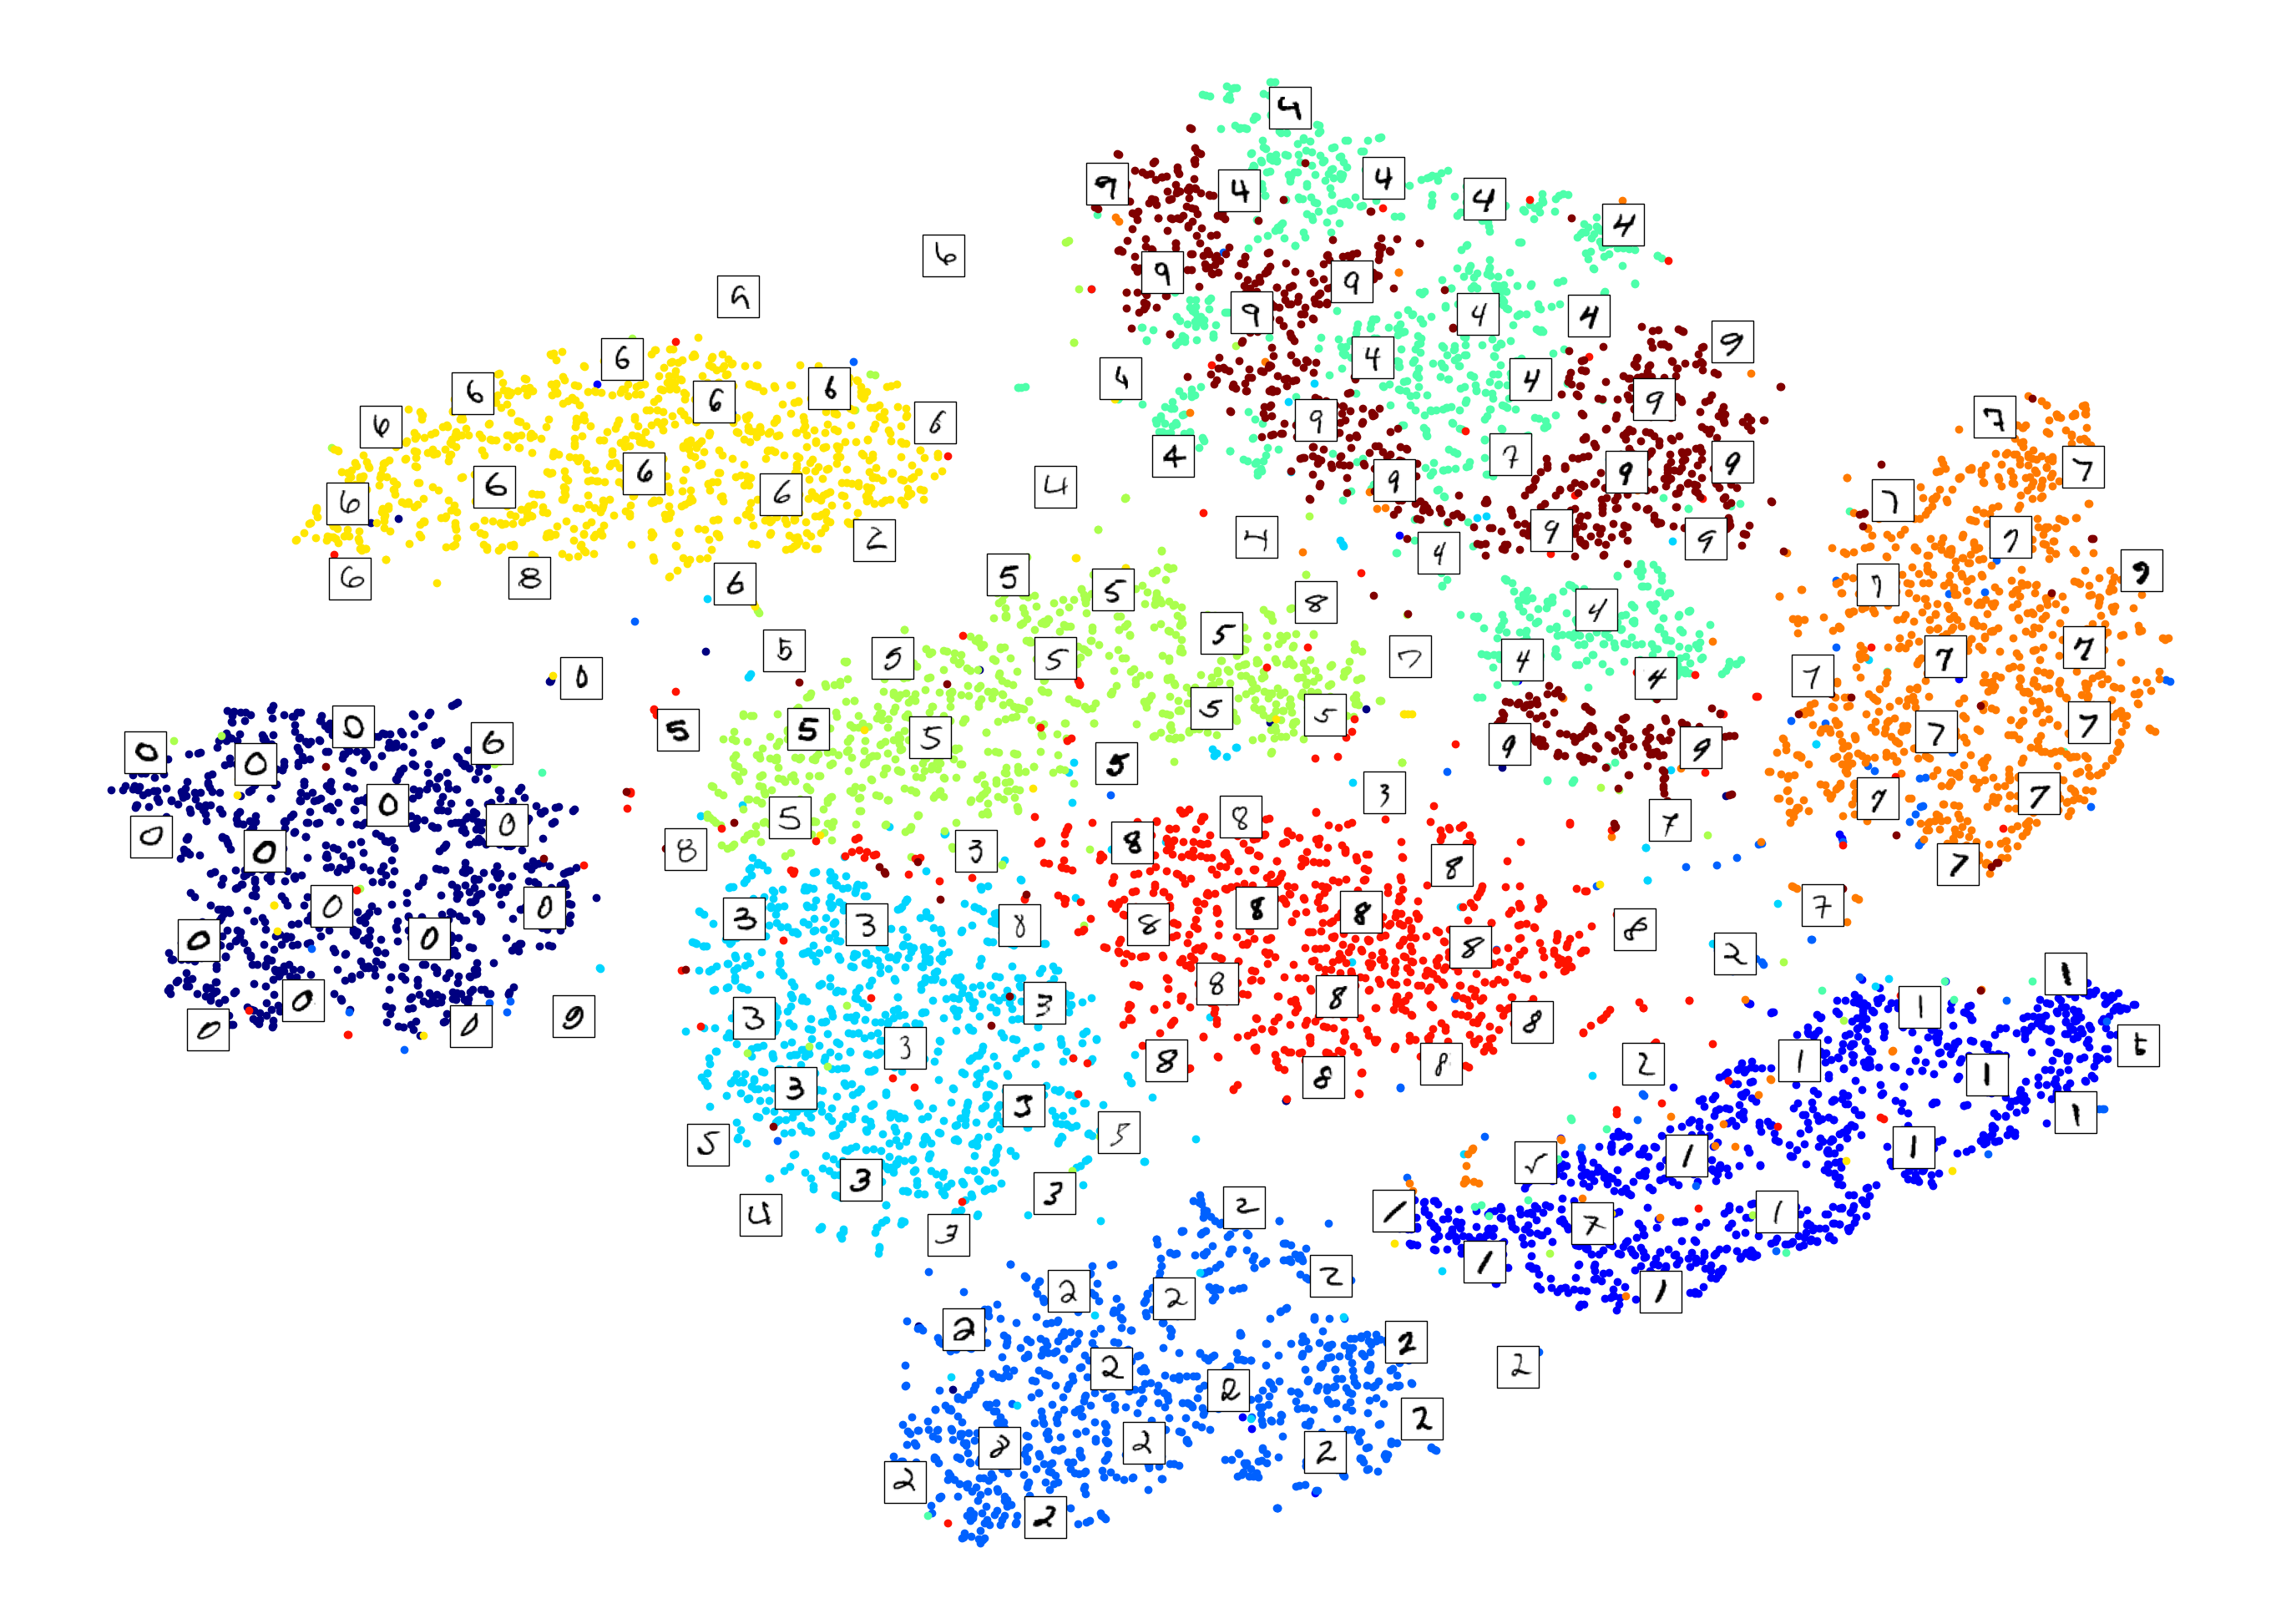

In [59]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))